In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats, signal

In [2]:
import sys

sys.path.append("../src")
sys.path.append("../src/tests")
sys.path.append("../src/bout")

In [3]:
import bout as bt
import test_activity_metric_functions as test_actvt
import activity.activity_assembly as actvt
import activity.subsampling as ss

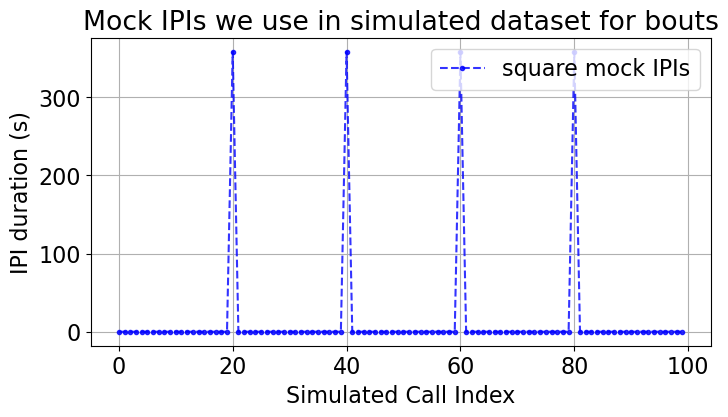

In [4]:
points = 100
desired_num_bouts = 5
calls_per_bout = points / desired_num_bouts
t = np.linspace(0, 1, points, endpoint=False)

call_duration = 0.01
desired_ipi = 0.09
bout_break_time = 360 - ((calls_per_bout*call_duration)+((calls_per_bout-1)*desired_ipi))
A = bout_break_time/2
mock_square_ipis = A*(signal.square(2 * np.pi * desired_num_bouts * t, duty=1/points) + 1)
mock_square_ipis[0] = desired_ipi
mock_square_ipis[mock_square_ipis==0] = desired_ipi

plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size':16})
plt.title('Mock IPIs we use in simulated dataset for bouts')
plt.plot(mock_square_ipis, color='blue', marker='.', alpha=0.8, linestyle='dashed', label='square mock IPIs')
plt.grid(which='both')
plt.ylabel('IPI duration (s)')
plt.xlabel('Simulated Call Index')
plt.legend(loc='upper right')
plt.show()

In [5]:
test_actvt.test_num_dets_metric_using_simulated_dataset()